In [13]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("HP_engine.csv")
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10650,Ford,Transit Connect,2015,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Cargo Minivan,29,21,5657,22330
9815,Kia,Sorento,2015,regular unleaded,290.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,25,18,1720,36700
446,BMW,4 Series,2017,premium unleaded (recommended),248.0,4.0,AUTOMATIC,rear wheel drive,2.0,Luxury,Midsize,Convertible,34,23,3916,50300
2335,Dodge,Caravan,2006,regular unleaded,180.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Large,Passenger Minivan,24,17,1851,22520
3045,Honda,CR-V,2014,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,31,23,2202,25220


<AxesSubplot:xlabel='Number of Doors'>

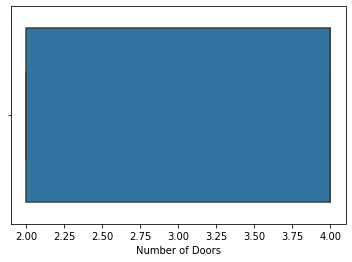

In [14]:
# No outliers
sns.boxplot(x=df['Number of Doors'])
# Esta gráfica representa todos los valores están comprendidos dentro del rango, no hay anomalias

<AxesSubplot:xlabel='Engine HP'>

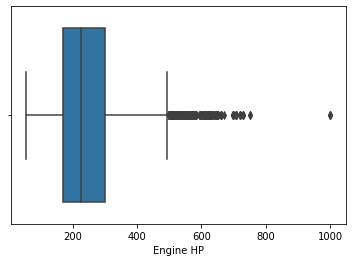

In [15]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [16]:
import numpy as np 

s = [1,3,3,3,3,3,3,3,3,3,3,3.5,4,4,4,4,4,4,4,4,4,4,5,5,5,5]
s_a = np.asarray(s)

length = len(s)
media = s_a.mean()
std = s_a.std()
mediana = np.median(s_a)

print("media:", s_a.mean())
print("std:", s_a.std())
print("median:", mediana)   # La mediana es el percentil 50
print("length:", length)

media: 3.6346153846153846
std: 0.8721954208037359
median: 4.0
length: 26


In [17]:
diferencia = abs(media - 1)
print("Diferencia con respecto a la media:\n", diferencia)

Diferencia con respecto a la media:
 2.6346153846153846


<AxesSubplot:>

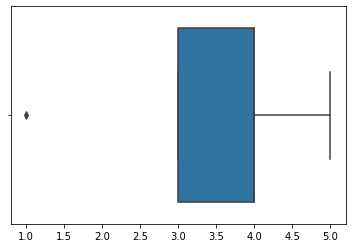

In [18]:
sns.boxplot(x=s_a)
# En este caso Q3 = 3 (cuartil 3) que a su vez es el mínimo de la tabla (porque no hay otra linea como la que señala el max, estan superpuestas)
# La mediana = 3.5
# Q1 = 4 el último de la caja
# max que considera no anomalo es 5
# Tenemos un valor anómalo = 1

In [19]:
# Las anomalías pueden parecer datos normales porque tenemos muy pocos datos

<AxesSubplot:xlabel='Engine HP'>

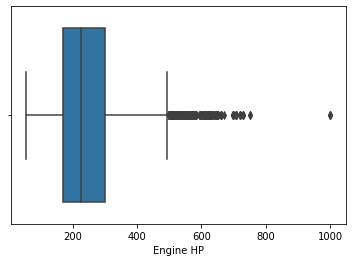

In [20]:
# Outliers = anomalías
sns.boxplot(x=df['Engine HP'])

In [21]:
df["Engine HP"].quantile(0.25)

170.0

In [22]:
df["Engine HP"].quantile(0.75)

300.0

In [23]:
df["Popularity"].max()  #int

5657

In [24]:
df["Popularity"].quantile(1)    #float

5657.0

In [25]:
df["Popularity"].min()

2

In [26]:
df["Popularity"].quantile(0)

2.0

In [27]:
df["Popularity"].quantile(0.75)

2009.0

In [28]:
df["Popularity"].quantile(0.5)  #median

1385.0

In [29]:
df["Popularity"].median()

1385.0

<AxesSubplot:xlabel='Popularity'>

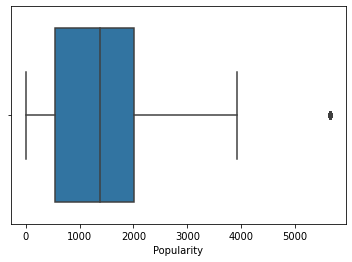

In [30]:
sns.boxplot(x=df['Popularity'])

In [31]:
df.quantile(0.25)

Year                 2007.0
Engine HP             170.0
Engine Cylinders        4.0
Number of Doors         2.0
highway MPG            22.0
city mpg               16.0
Popularity            549.0
MSRP                21000.0
Name: 0.25, dtype: float64

In [32]:
df.quantile(0.75)

Year                 2016.00
Engine HP             300.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            30.00
city mpg               22.00
Popularity           2009.00
MSRP                42231.25
Name: 0.75, dtype: float64

In [33]:
# Hard technique

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64

In [34]:
df.shape

(11914, 16)

In [35]:
IQR * 1.5

Year                   13.500
Engine HP             195.000
Engine Cylinders        3.000
Number of Doors         3.000
highway MPG            12.000
city mpg                9.000
Popularity           2190.000
MSRP                31846.875
dtype: float64

In [36]:
# Límite superior antes de outlier
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

In [37]:
# Límite inferior antes de outlier
(Q1 - (1.5 * IQR))

Year                 1993.500
Engine HP             -25.000
Engine Cylinders        1.000
Number of Doors        -1.000
highway MPG            10.000
city mpg                7.000
Popularity          -1641.000
MSRP               -10846.875
dtype: float64

<AxesSubplot:xlabel='Engine HP'>

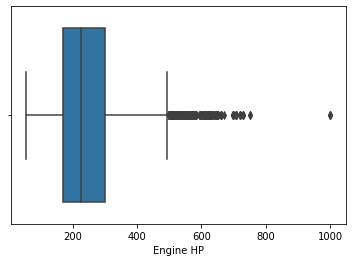

In [38]:
# Outliers
sns.boxplot(x=df['Engine HP'])

In [39]:
(Q3 + 1.5 * IQR)

Year                 2029.500
Engine HP             495.000
Engine Cylinders        9.000
Number of Doors         7.000
highway MPG            42.000
city mpg               31.000
Popularity           4199.000
MSRP                74078.125
dtype: float64

valor max para engine HP 1001.0
ipykernel_launcher:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
ipykernel_launcher:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


<AxesSubplot:xlabel='Engine HP'>

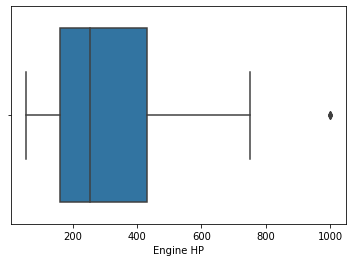

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR_RIC = Q3 - Q1
limite_inferior = (Q1 - 1.5 * IQR_RIC)
limite_superior = (Q3 + 1.5 * IQR_RIC)

# Get the real rows 
# Esto está cogiendo todos los valores que están dentro de los límites superior e inferior del boxplot que representan outliers
df2 = df[((df < limite_inferior) | (df > limite_superior)).any(axis=1)]
# Valores que están fuera del rango --> Los outliers
print("valor max para engine HP", df2['Engine HP'].quantile(1))
sns.boxplot(x=df2['Engine HP'])

# Seguimos mostrando valores que no son outliers porque la condición df2 se está haciendo a todas las columnas, no solo a 'Engine HP', en algunas columnas habrá outliers que esten entre 200 y 400 por eso en la gráfica se muestran. No significa que Engine HP tenga esos outliers

In [51]:
# Coger solo los outliers de Engine HP
# limite inferior
li_hp = limite_inferior["Engine HP"]
ls_hp = limite_superior["Engine HP"]

df_engineHP_column = df["Engine HP"]
# Cogemos solo los outliers de la columna Engine HP
df_engineHP_with_outliers = df[((df["Engine HP"] < li_hp) | (df["Engine HP"] > ls_hp))]
engine_hp_filtered = df_engineHP_with_outliers["Engine HP"]
engine_hp_filtered

466      562.0
467      562.0
468      562.0
469      597.0
470      562.0
         ...  
11509    567.0
11510    567.0
11523    567.0
11524    567.0
11525    567.0
Name: Engine HP, Length: 509, dtype: float64

In [52]:
engine_hp_filtered.min()

500.0

<AxesSubplot:xlabel='Engine HP'>

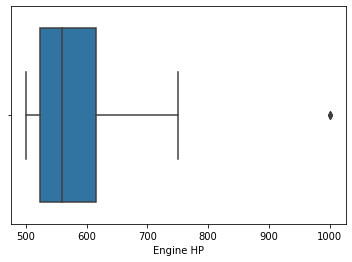

In [53]:
# Engine HP ONLY outliers
sns.boxplot(x=engine_hp_filtered)

# Ahora todos los valores estan por encima del original 495 (percentil 3) lo que significa que la gráfica solo está representando a los outliers de Engine HP. Como no hay ningún valor por debajo del percentil 1, eso significa que no hay outliers por debajo de ese valor

In [12]:
(Q3 + 1.5 * IQR)

NameError: name 'Q3' is not defined

In [ ]:
#~ --> altGr + 4 y espacio
#| --> altGr + 1

In [81]:
# Get the opposite --> Valores que no son outliers
df3 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2.shape)
df3.shape
# la tabla sin outliers queda con 9084 elementos de 2830 originales que teniamos, lo que significa que estamos perdiendo bastantes datos. Si es el caso podríamos ajustar el "1.5" que multiplicamos con IQR para no perder tantos datos. Esto haría que los datos no fuesen completamente objetivos, pero dependiendo de los datos no podemos siempre usar el mismo threshold

(2830, 16)


(9084, 16)

In [87]:
df3['Engine HP'].min()

66.0

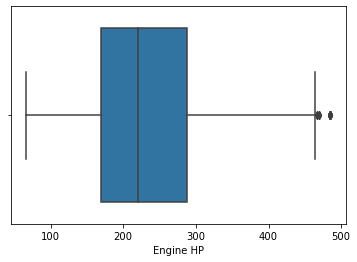

In [85]:
sns.boxplot(x=df3['Engine HP'])

Year                 2016.00
Engine HP             288.00
Engine Cylinders        6.00
Number of Doors         4.00
highway MPG            31.00
city mpg               22.00
Popularity           1851.00
MSRP                39408.75
Name: 0.75, dtype: float64

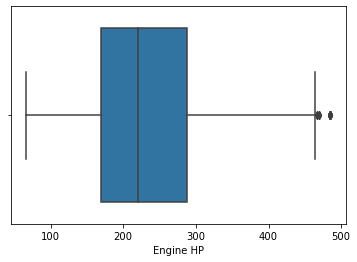

In [50]:
# Outliers After
sns.boxplot(x=df2['Engine HP'])

df2.quantile(0.75)

In [45]:
df.quantile(1)

Year                   2017.0
Engine HP              1001.0
Engine Cylinders         16.0
Number of Doors           4.0
highway MPG             354.0
city mpg                137.0
Popularity             5657.0
MSRP                2065902.0
Name: 1, dtype: float64